# Q-Learning with Mazes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import maze_functions

%matplotlib inline

### Q-Learning

[Q-Learning](https://en.wikipedia.org/wiki/Q-learning)
$$
Q: S \times A \to \mathbb{R}
$$
In practice, $Q$ is unknown, so we initialize it in some way and repeatedly update it using the following rule:
$$
Q_{t + 1} (s_{t}, a_{t}) = (1 - \alpha) \cdot Q_{t}(s_t, a_t) + \alpha \cdot \left( r_{t + 1} + \gamma \cdot \max_{a} Q_{t}(s_{t + 1}, a) \right)
$$
where $\alpha$ is the learning rate, $r_{t + 1}$ is the reward observed going from state $s_t$ to state $s_{t + 1}$ via action $a_t$, and $\gamma$ is a discount factor. That is, we update the value of $Q$ corresponding to the state-action pair $(s_t, a_t)$ using the old value, the observed reward, and the expected future reward.

In [3]:
def softmax(scores):
    '''
    Compute and return the softmax of a vector of scores
    '''
    # Exponentiate and scale to avoid numerical computation issues
    max_val = np.max(scores)
    exponentiated = np.exp(scores - max_val)
    
    # Compute normalization constant
    normalization_constant = np.sum(exponentiated)
    
    return (exponentiated/normalization_constant)

def initialize_states(maze, reward):
    '''
    Initialize the state for each cell so that each possible action 
    occurs with equal probability
    
    Returns:
        states: initial list of score vectors for each state
    '''
    states = []
    for cell in range(maze.n_rows * maze.n_cols):
        # Initially, all actions have equal weight
        states.append(np.zeros(4))
        
        # Make impossible actions (out of bounds or wall) impossible
        for index, direction in enumerate(maze.DIRECTIONS):
            if not maze.is_legal_move(cell, direction):
                states[cell][index] = - np.infty
                
    # Completing the maze is a terminal state, so we set the value to
    # be the reward for completing the maze
    states[maze.end_index] = reward * np.ones(4)
    return states

def make_move(cell, states, maze):
    '''
    Randomly selects a move from the possible options and updates the
    utility function.
    
    Args:
        cell (int): current location
        states (list): list of score vectors for each possible state
        maze (Maze): maze that's being explored
    
    Returns:
        new_cell (int): new location, following the move
    '''
    new_direction = np.random.choice(maze.DIRECTIONS, p = softmax(states[cell]))
    
    states = update_states(cell, new_direction, states, maze, 
                           gamma = 0.99, alpha = 0.1)
    
    new_cell = maze_functions.next_cell(cell, new_direction, maze.n_cols)
    return new_cell

def update_states(cell, direction, states, maze, gamma, alpha):
    """
    Update utitlity function
    """
    observed_reward = 0
    
    new_cell = maze_functions.next_cell(cell, direction, maze.n_cols)
    expected_reward = np.max(states[new_cell])
    
    dir_index = maze.DIRECTIONS.index(direction)
    states[cell][dir_index] = ((1 - alpha) * states[cell][dir_index]
                               + gamma * (observed_reward + expected_reward))
    
    return states

def plot_path(path, maze):
    """
    Plot a heatmap of the attempted path through the maze
    """
    counts = pd.value_counts(path)
    max_count = counts.max()
    opacity = counts/max_count
    
    array_length = maze.n_rows * maze.n_cols
    rgba_array = [[1, 0, 0, 0] for i in range(array_length)]
    for i in range(array_length):
        if i in opacity.index:
            rgba_array[i][3] = opacity[i]
    plt.imshow(np.reshape(rgba_array, [maze.n_rows, maze.n_cols, 4]))

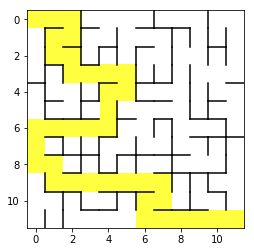

In [4]:
maze_12x12 = maze_functions.Maze(n_rows = 12, n_cols = 12, seed = 81)
maze_12x12.plot(with_solution = True)

Game #0
Path Length: 929


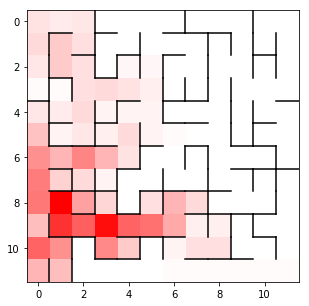

Game #1
Path Length: 3059


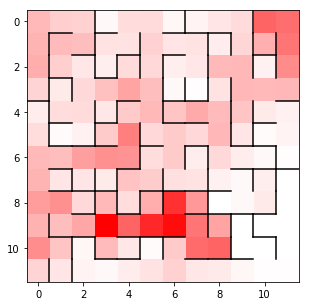

Game #2
Path Length: 2561


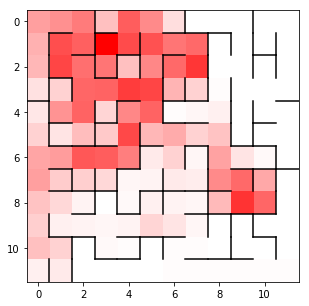

Game #3
Path Length: 3727


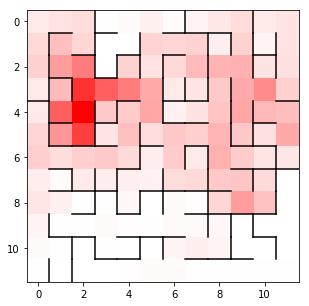

Game #4
Path Length: 2471


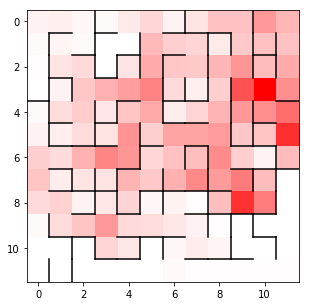

Game #5
Path Length: 711


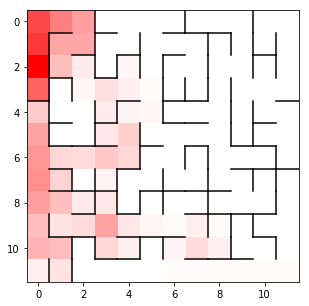

Game #6
Path Length: 1563


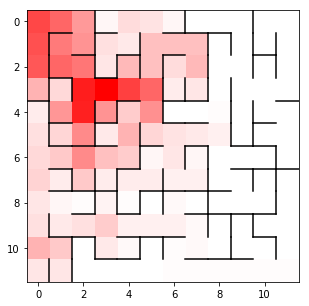

Game #7
Path Length: 1417


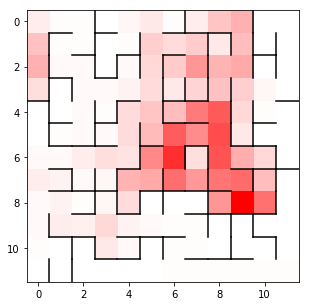

Game #8
Path Length: 11923


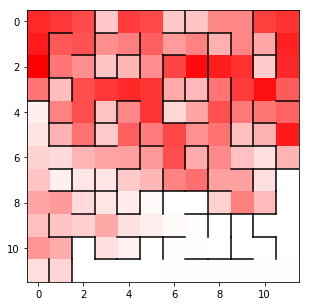

Game #9
Path Length: 3283


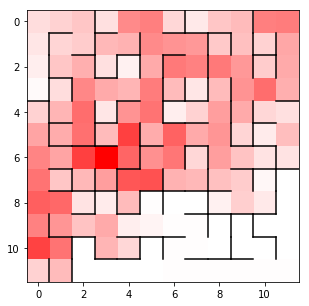

Game #10
Path Length: 671


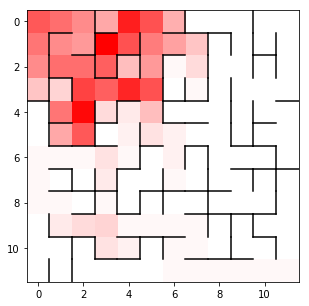

Game #11
Path Length: 275


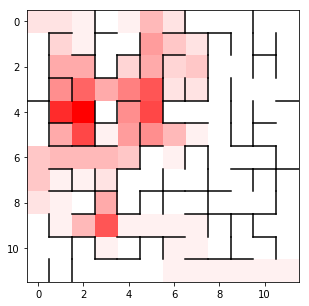

Game #12
Path Length: 1189


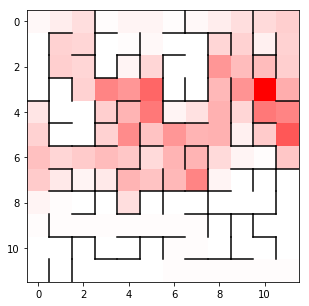

Game #13
Path Length: 2563


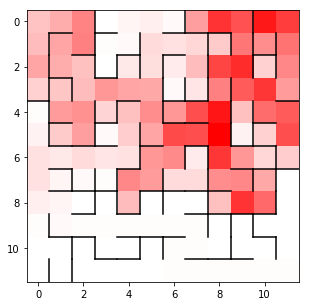

Game #14
Path Length: 319


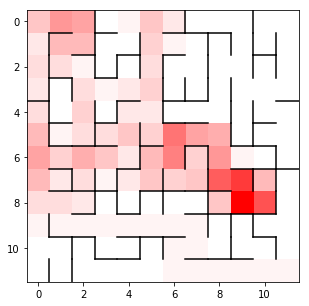

Game #15
Path Length: 159


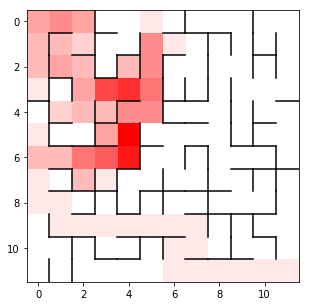

Game #16
Path Length: 3013


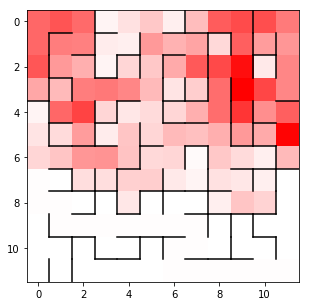

Game #17
Path Length: 179


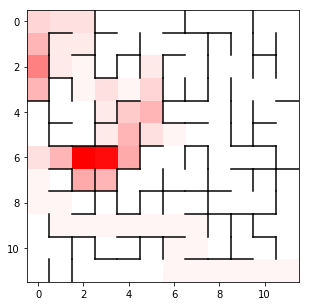

Game #18
Path Length: 1629


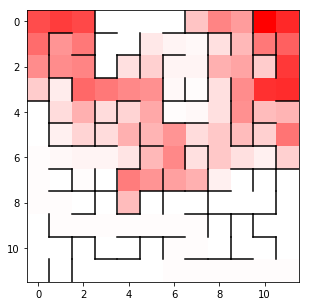

Game #19
Path Length: 3467


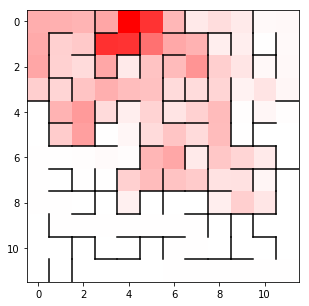

Game #20
Path Length: 777


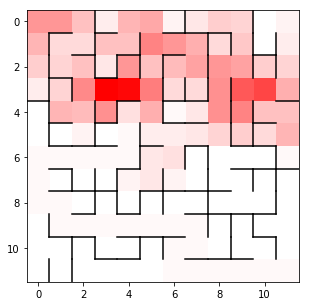

Game #21
Path Length: 229


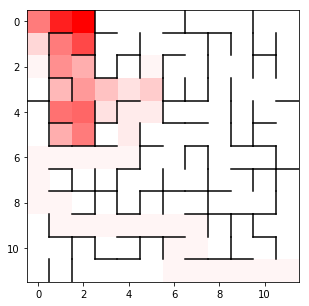

Game #22
Path Length: 137


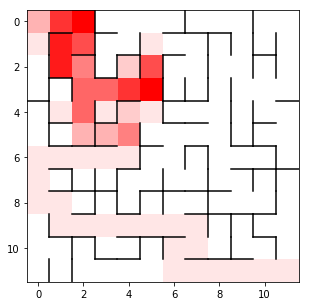

Game #23
Path Length: 137


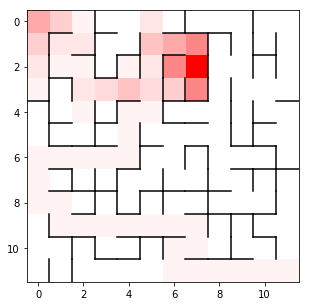

Game #24
Path Length: 591


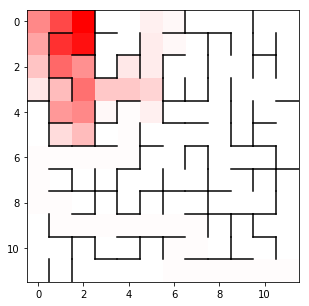

Game #25
Path Length: 233


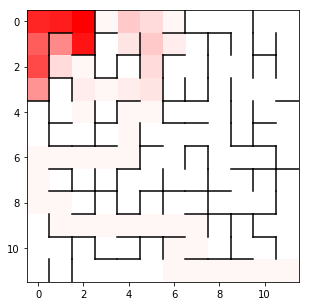

Game #26
Path Length: 97


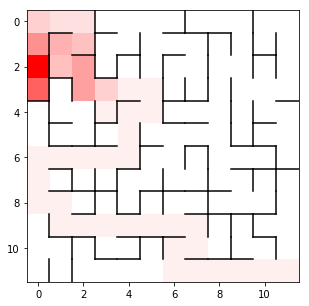

Game #27
Path Length: 79


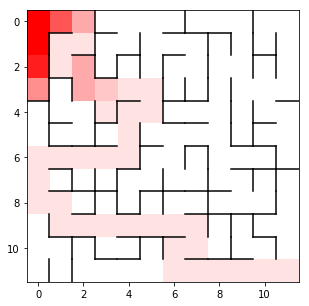

Game #28
Path Length: 99


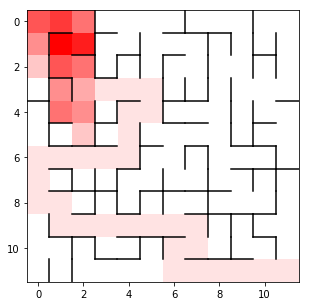

Game #29
Path Length: 193


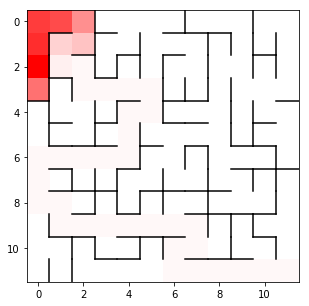

Game #30
Path Length: 51


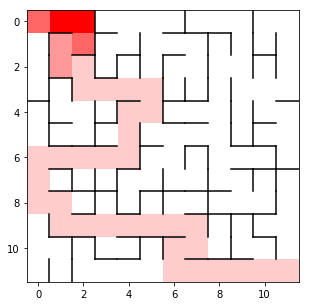

Game #31
Path Length: 65


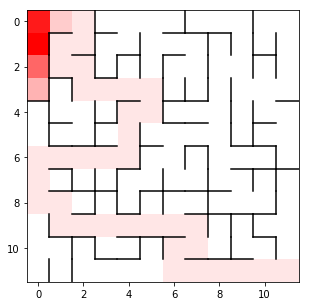

Game #32
Path Length: 81


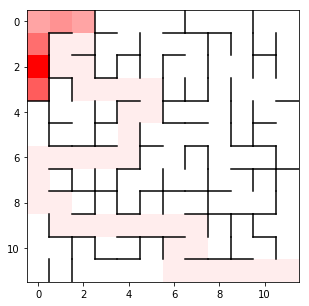

Game #33
Path Length: 37


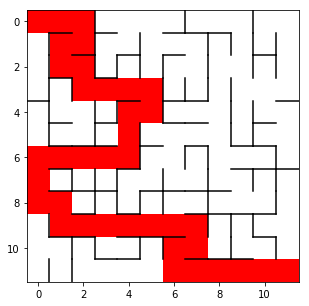

Game #34
Path Length: 101


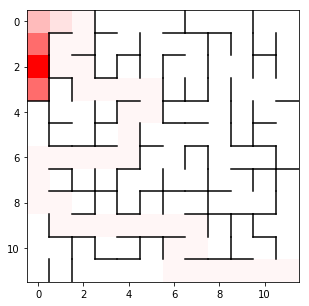

Game #35
Path Length: 51


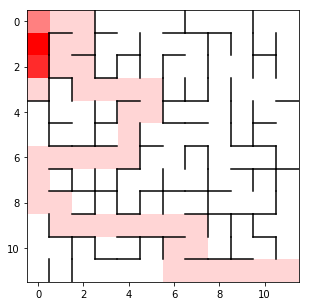

Game #36
Path Length: 37


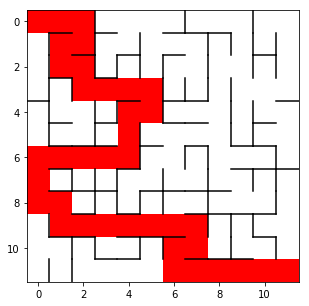

Game #37
Path Length: 37


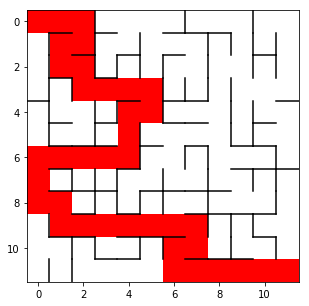

Game #38
Path Length: 37


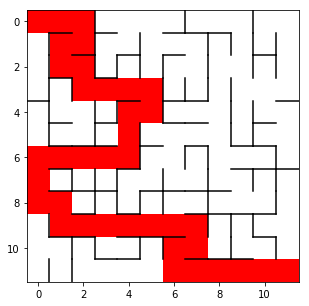

Game #39
Path Length: 37


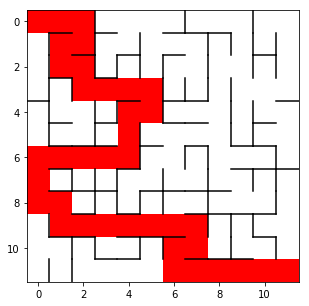

Game #40
Path Length: 37


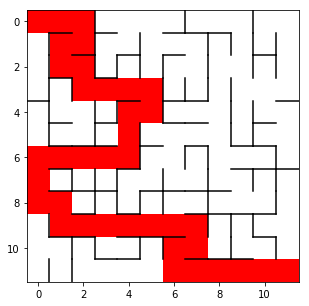

Game #41
Path Length: 37


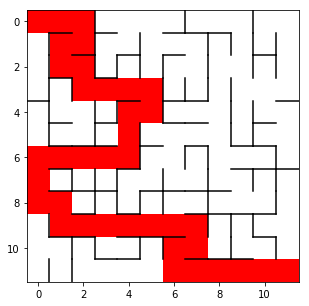

Game #42
Path Length: 37


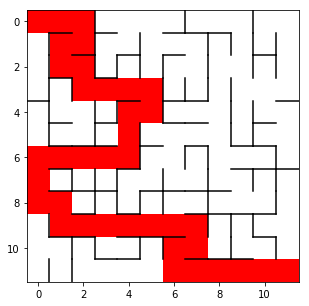

Game #43
Path Length: 37


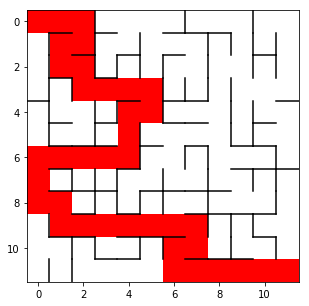

Game #44
Path Length: 37


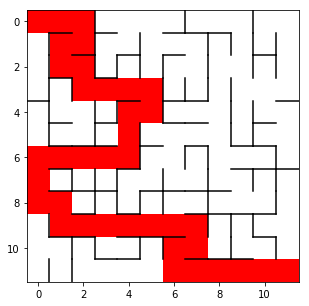

Game #45
Path Length: 37


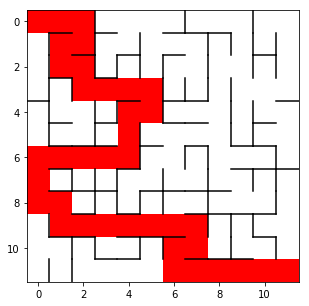

Game #46
Path Length: 37


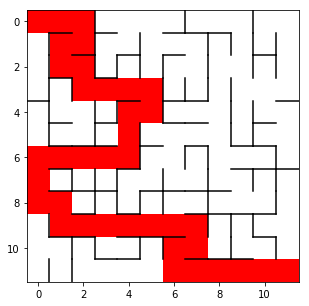

Game #47
Path Length: 37


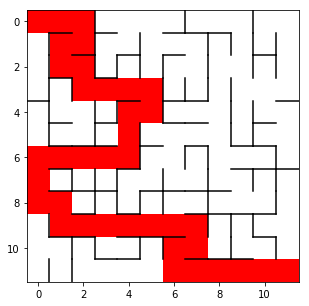

Game #48
Path Length: 37


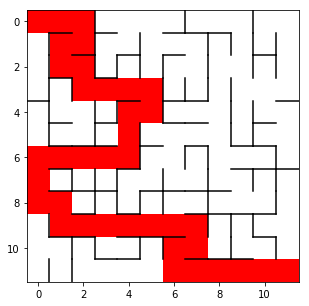

Game #49
Path Length: 37


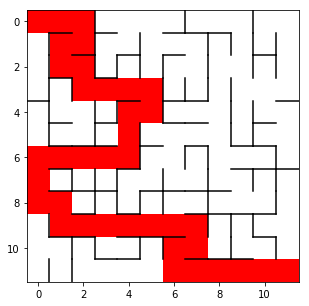

In [5]:
states_12x12 = initialize_states(maze_12x12, reward = 10)
max_turns = 100000
path_lengths_12x12 = []

for game in range(50):
    cell = 0
    path_12x12 = [cell]
    
    for turn in range(max_turns):
        cell= make_move(cell, states_12x12, maze_12x12)
        path_12x12.append(cell)
        if cell == maze_12x12.end_index:
            break
    path_lengths_12x12.append(len(path_12x12))

    print('Game #{}\nPath Length: {}'.format(game, len(path_12x12)))
    fig = plt.figure(figsize = [5, 5])
    maze_12x12.plot()
    plot_path(path_12x12, maze_12x12)
    plt.show()

True solution: 37
Final attempt: 37


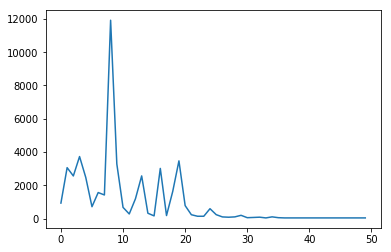

In [6]:
print('True solution: {}'.format(len(maze_12x12.solution)))
print('Final attempt: {}'.format(len(path_12x12)))
plt.plot(path_lengths_12x12)
plt.show()

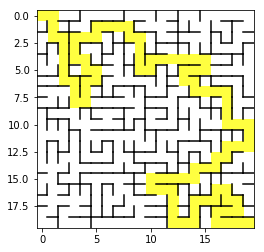

In [7]:
maze_20x20 = maze_functions.Maze(n_rows = 20, n_cols = 20, seed = 5)
maze_20x20.plot(with_solution = True)

Game #0


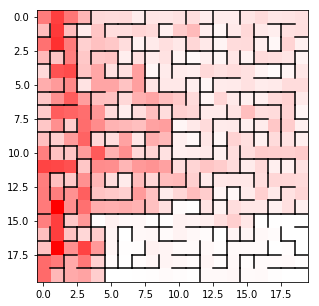

Game #5


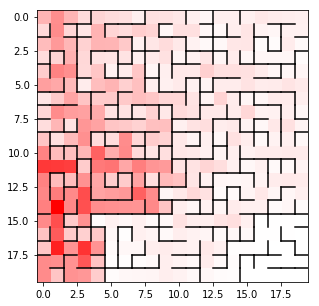

Game #10


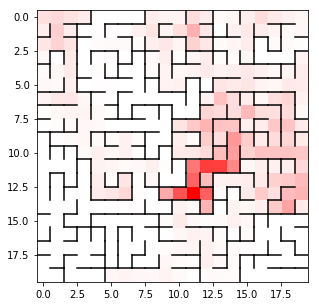

Game #15


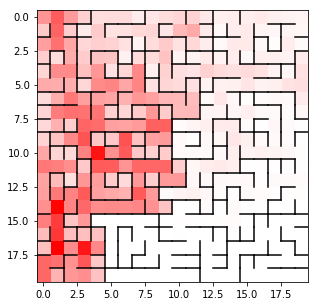

Game #20


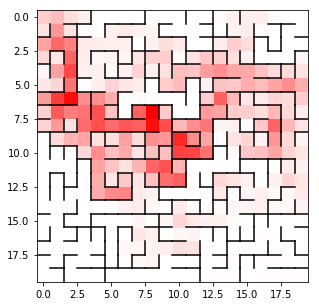

Game #25


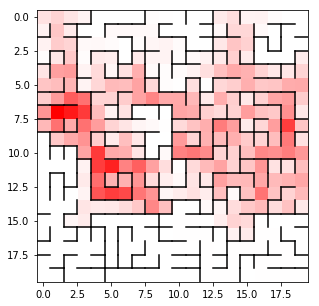

Game #30


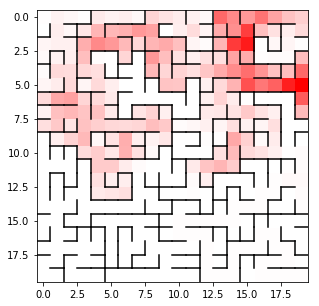

Game #35


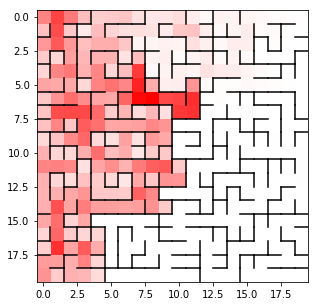

Game #40


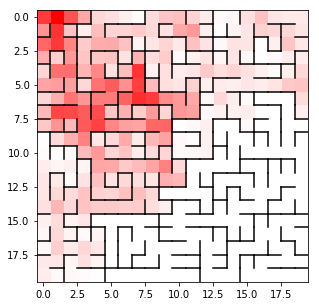

Game #45


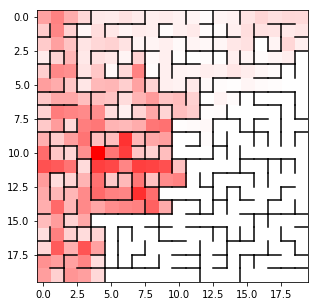

Game #50


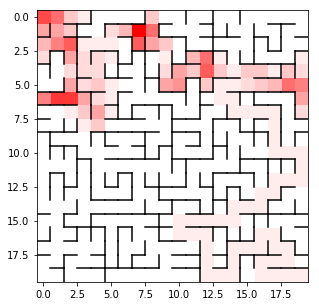

Game #55


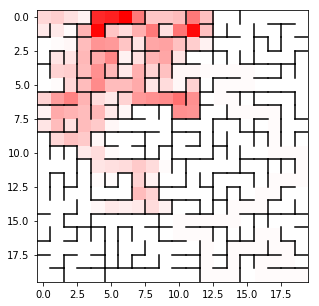

Game #60


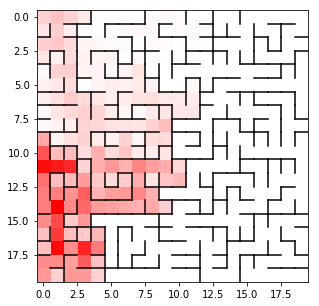

Game #65


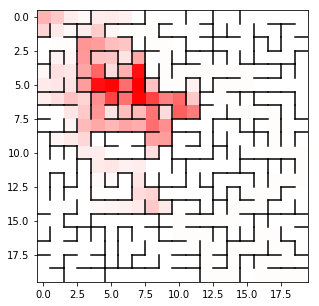

Game #70


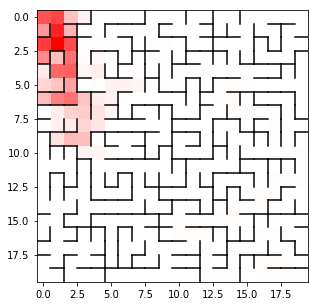

Game #75


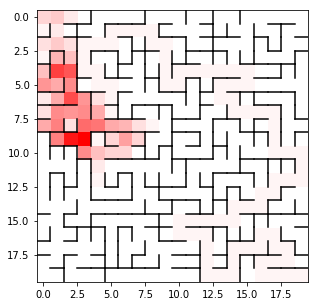

Game #80


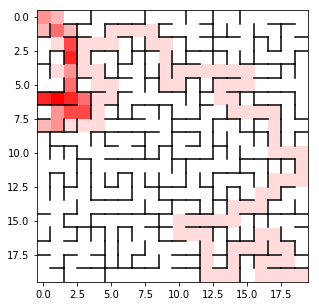

Game #85


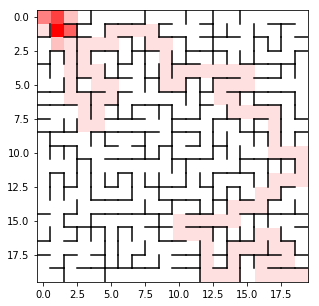

Game #90


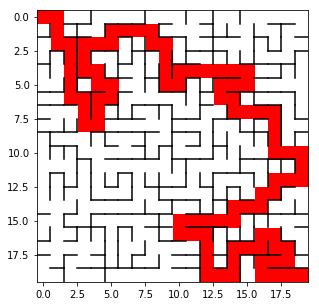

Game #95


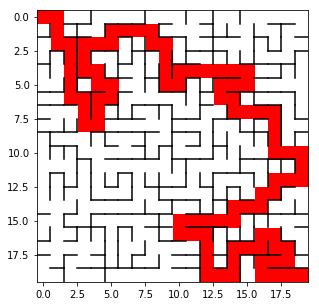

Game #100


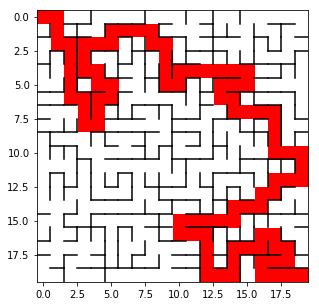

Game #105


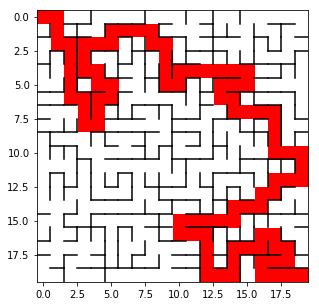

Game #110


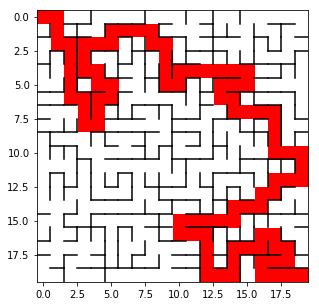

Game #115


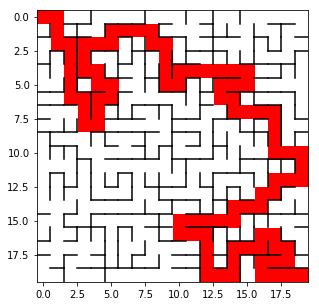

Game #120


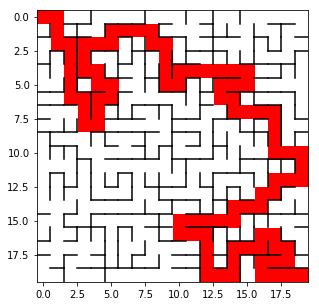

In [8]:
states_20x20 = initialize_states(maze_20x20, reward = 10)
max_turns = 100000
path_lengths_20x20 = []

for game in range(121):
    cell = 0
    path_20x20 = [cell]
    
    for turn in range(max_turns):
        cell = make_move(cell, states_20x20, maze_20x20)
        path_20x20.append(cell)
        if cell == maze_20x20.end_index:
            break
    path_lengths_20x20.append(len(path_20x20))
    if game % 5 == 0:
        print('Game #{}'.format(game))
        fig = plt.figure(figsize = [5, 5])
        maze_20x20.plot()
        plot_path(path_20x20, maze_20x20)
        plt.show()

True solution: 91
Final attempt: 91


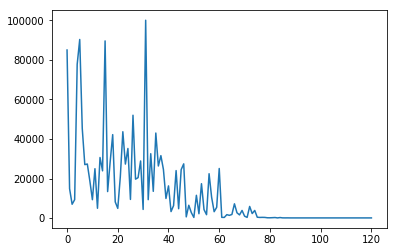

In [9]:
print('True solution: {}'.format(len(maze_20x20.solution)))
print('Final attempt: {}'.format(len(path_20x20)))
plt.plot(path_lengths_20x20)
plt.show()